In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '..')
import trajectory_reconstruction_tradeoff as T

In [2]:
dirname = '../'
datadir = os.path.join(dirname, 'datasets')
outdir = os.path.join(dirname, 'output' )


In [3]:
# d = 8
# dataset = 'bending_map%d' % d

# nc = 1000
# X = T.io.bending_map(nc=nc, d=d)
# traj = T.tr.Trajectory(X=X, do_original_locs=True, do_preprocess=False)
# T.pl.plot_pca2d(traj.pX)
# adata = sc.AnnData(X)
# adata.write_h5ad(os.path.join(datadir, f'{dataset}.h5ad'))

/Users/nomo/PycharmProjects/trajectory_reconstruction_tradeoff/notebooks/../trajectory_reconstruction_tradeoff/trajectory/trajectory.py:143: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(self.X)


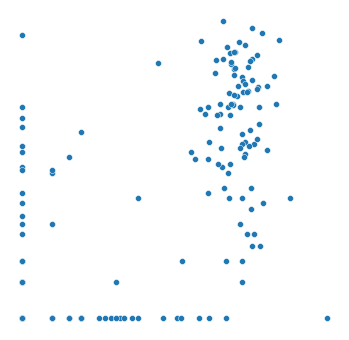

In [27]:
# read trajectory
by_hvgs = True

dataset = 'hayashi' #'hematopoiesis'#  #'hayashi' # 'linear_rep0' #'hematopoiesis' #  #'fibroblasts'#'hepatoblast' #
X,_, meta = T.io.read_dataset(dataset, datadir)
traj = T.tr.Trajectory(X, meta=meta, by_hvgs=by_hvgs)
T.pl.plot_pca2d(traj.pX)

# pt = 1e-3
# L = traj.compute_tradeoff(B=-1, Pc=[0.5], Pt=[1], repeats=1)
# sX, psX, psD, sD, psP, ix,pca = traj.subsample(pc=1, pt=pt)
# T.pl.plot_pca2d(psX)


In [32]:
# T.pl.plot_spring_layout(traj.pX)

KeyError: (0, 0)

In [3]:
# # nc = 400
# # scale_noise = 30
# # R = 100
# # reverse_log1p = False
# # frac_curve = 1
# # p_in_k = 0.5
# # dims = 100
# # do_log1p = False
# # do_preprocess = True

# nc = 400
# scale_noise = 0.1 # 2
# R = 10
# frac_curve = 1

# # involve entire preprocessing procedure
# dims = 100
# do_preprocess=True
# do_log1p = True
# reverse_log1p = True

# # # skip log/exp operations
# # dims = 100
# # do_preprocess=True
# # do_log1p = False
# # reverse_log1p = False
# # # TODO: R is not recovered exactly 


# # # operate on latent space directly
# # dims = 2
# # do_preprocess=False
# # do_log1p = False
# # reverse_log1p = False


# dataset = 'curve_simul'
# X = T.io.curve_trajectory(nc=nc, frac_curve=frac_curve, R=R, scale_noise=scale_noise, dims=dims, reverse_log1p=reverse_log1p)

# # dataset = 'curve_cluster_simul'
# # pX = T.io.curve_clusters_trajectory(nc=nc, p_in_k=p_in_k, R=R, scale_noise=scale_noise, dims=dims)
# traj = T.tr.Trajectory(X, do_preprocess=do_preprocess, do_log1p=do_log1p) # do_preprocess=False, do_original_locs=True
# T.pl.plot_pca2d(traj.pX)

In [3]:
dim1,dim2 = traj.pX.columns[[0,1]]
dim1_range = traj.pX[dim1].max() - traj.pX[dim1].min()
dim2_range = traj.pX[dim2].max() - traj.pX[dim2].min()
print(dim1_range)
print(dim2_range)
R_emp = np.maximum(dim1_range/2, dim2_range/2)

124.10493650258195
107.67099363329638


/Users/nomo/opt/miniconda3/envs/traj/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nomo/opt/miniconda3/envs/traj/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

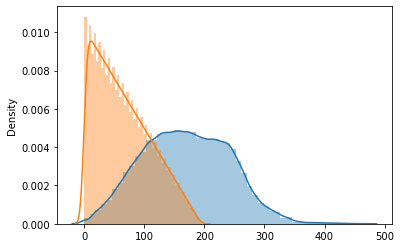

In [4]:
# examine original distance distribution
kde = True
sns.distplot(traj.D.flatten(), kde=kde, label='Distance distribution')

nc = traj.ncells
jump_len = np.pi * R_emp / nc
D_pred = np.repeat(np.arange(0,nc,1), np.arange(nc,0,-1)) * jump_len
sns.distplot(D_pred, kde=kde, label='Predicted')


In [7]:
# for gcol in traj.X:
#     cnts = traj.X[gcol].value_counts()
#     if len(cnts) > 1:
#         # print(cnts)
#         print(gcol)

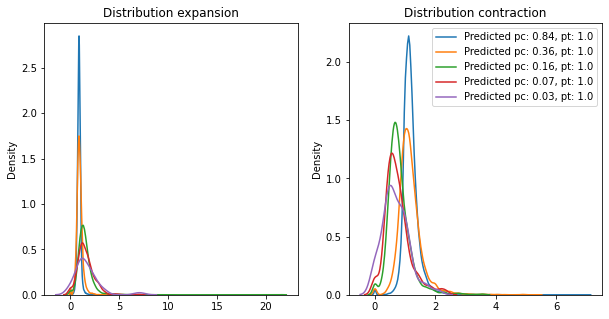

In [7]:
# # read s
# ones_like(Pt)

# cell subsample
Pc = np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)#np.round(0.01 * 2 ** np.arange(0, 6.7, 0.34), 3) # np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)
# Pc = np.array(0.05)
Pc = Pc[::4]
Pc = Pc[Pc > 6/traj.ncells]
# Pc = list(Pc) + [0.95]
Pvar = Pc = Pc[::-1]
Pt = Pconst = np.ones_like(Pvar)

repeat = 1
eps = 1e-6
fig, ax = plt.subplots(1,2, figsize=(10,5))
# sns.kdeplot(traj.D.flatten(), label='Distance distribution')
for pt,pc in zip(Pt, Pc):
    sX, psX, psD, sD, psP, ix, pca = traj.subsample(pc,pt)
    # T.pl.plot_pca2d(psX)
    # sns.kdeplot(psD.flatten(), label=f'Predicted pc: {pc}, pt: {pt}')
    sns.kdeplot(psD.flatten()/(eps + sD.flatten()), label=f'Predicted pc: {pc}, pt: {pt}', ax=ax[0])
    sns.kdeplot(sD.flatten()/(eps + psD.flatten()), label=f'Predicted pc: {pc}, pt: {pt}', ax=ax[1])

ax[0].set_title('Distribution expansion')
ax[1].set_title('Distribution contraction')
plt.legend()

In [7]:
# import scanpy as sc
# X = T.io.curve_trajectory(nc=nc, frac_curve=frac_curve, R=R, scale_noise=scale_noise, dims=dims)
# adata = sc.AnnData(X)
# adata.write_h5ad(os.path.join(datadir, 'curve.h5ad'))

/var/folders/8y/cpqrd46n7ml80f139vjz9l240000gn/T/ipykernel_26791/946529675.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X)


In [25]:
# X = T.io.curve_trajectory(nc=nc, frac_curve=frac_curve, R=R, scale_noise=scale_noise, dims=dims)

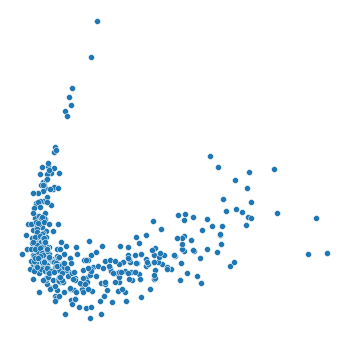

In [23]:
# # load trajectory
# # X, D, meta = T.io.read_dataset('curve', datadir)
# traj = T.tr.Trajectory(Y, meta=meta)
# T.pl.plot_pca2d(traj.pX)

In [ ]:
L = traj.compute_tradeoff(B=0.1, Pc=[0.5], Pt=[1], repeats=1, comp_deltas=True)

In [ ]:
# T.pl.plot_pca2d(traj.pX.values)
# T.pl.plot_pca2d(psX.values)

## Read downsampling

In [ ]:
## video pt
Pt = Pvar = 10 ** np.arange(-6, -0.5, 0.25)
Pc = np.ones_like(Pt)
repeat = 2

res_pt = []
res_path_max_dist = {}
for pt,pc in zip(Pt, Pc):
    # for r in np.arange(repeat):
    sX, psX, psD, sD, psP, ix = traj.subsample(pc,pt)

    D, P = T.ds.get_pairwise_distances(psX, return_predecessors=True)

    src,des = np.unravel_index(D.argmax(), D.shape)
    path_max_dist = T.ds.get_path(src, des, P)
    res_path_max_dist[pt] = path_max_dist
    
    df = psX[['PC1', 'PC2']]
    df['pc'] = pc
    df['pt'] = pt
    df['idx_c'] = ix
    df['idx'] = np.arange(len(ix))
    # df['repeat'] = r
    res_pt.append(df)

In [ ]:
df_pt = pd.concat(res_pt)
fname = os.path.join(outdir, f'{dataset}_pt.gif')
T.pl.generate_gif(df_pt, frameby='pt', xcol='pc0', ycol='pc1', fname=fname)

fname = os.path.join(outdir, f'{dataset}_pt_const_size.gif')
T.pl.generate_gif(df_pt, frameby='pt', xcol='pc0', ycol='pc1', fname=fname, const_size=True)


## Cell downsampling

In [ ]:
%matplotlib inline
## video pc
Pc = np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)#np.round(0.01 * 2 ** np.arange(0, 6.7, 0.34), 3) # np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)
# Pc = np.array(0.05)
Pc = Pc[::4]
Pvar = Pc = Pc[Pc > 6/traj.ncells]
Pvar = Pc = list(Pc) + [0.95]
Pt = Pconst = np.ones_like(Pvar)

res_pc = []
res_path_max_dist = {}
res_nearest_neighbor = {}

ncols = 3
fig,ax = plt.subplots(1,ncols,figsize=(6*ncols,6))
est_err_list = []
for pt,pc in zip(Pt, Pc):
    # sX, _, _, _, _, ix = traj.subsample(pc,pt)
    sX, psX, psD, sD, psP, ix = traj.subsample(pc,pt)
    
    # ix[0] = 0
    # sX.iloc[0] = traj.X.iloc[0]

    # ix[-1] = traj.ncells - 2
    # sX.iloc[-1] = traj.X.iloc[-1]

    # psX = traj.preprocess(sX)

    D, P = T.ds.get_pairwise_distances(psX, return_predecessors=True, verbose=True, plot=False)
    
    dmax_psD = np.max(psD); npsD = psD / dmax_psD
    dmax_sD = np.max(sD); nsD = sD / dmax_sD

    # compute error
    l1, l2, l3, lsp = T.ds.compare_distances(npsD, nsD)
    l_contrac = (sD / psD)[np.triu_indices_from(sD, 1)]
    l_expand = (psD / sD)[np.triu_indices_from(sD, 1)]
    l_distortion = np.mean(np.maximum(l_contrac,l_expand))
    # lr = np.abs(nsD - npsD)[np.triu_indices_from(sD, 1)]
    # sns.distplot(lr, label=pc, hist=False, ax=ax)

    # plt.title(f'Ratio error d_S / d_G : {np.mean(lr)}')
    # src = 0
    # des = sX.shape[0]-1
    src,des = np.unravel_index(D.argmax(), D.shape)
    path_max_dist = get_path(src, des, P)
    res_path_max_dist[pc] = path_max_dist
    
    df = psX.copy() #pd.DataFrame(psX[:,:2], columns=['pc0', 'pc1'])
    df['pc'] = pc
    df['pt'] = pt
    df['idx_c'] = ix
    df['idx'] = np.arange(len(ix))
    df['l1'] = l1
    res_pc.append(df)
    # break
    sns.distplot(nsD.flatten(), label=pc, hist=False, ax=ax[0])
    
    k = 5 # number of prosstt clusters
    nk = int(pc * traj.ncells / k)
    # nsD_pred = k * nk**2
    nsD_pred = np.repeat(np.arange(k,-1,-1), np.arange(k+1) * nk**2)
    nsD_pred = np.concatenate((nsD_pred, nsD_pred[:-k*nk**2]))
    # nsD_pred = np.concatenate((nsD_pred, np.zeros(nk)))
    sns.distplot(nsD_pred, label=pc, hist=False, ax=ax[1])

    # plot error
    bins = 5
    lr = np.abs(nsD - npsD)#[np.triu_indices_from(sD, 1)]
    tmp = pd.DataFrame({'org dists': nsD.flatten(), 'l1': lr.flatten()})
    tmp['org dists cut'] = pd.cut(tmp['org dists'], bins=bins, labels=np.arange(bins))
    avg_err = tmp.groupby('org dists cut')['l1'].mean()
    ax[2].plot(avg_err.index, avg_err.values, label=pc)


    # # estimate error per gap
    # dmax0 = np.max(traj.D)
    # R = 0.3
    # dmax = dmax0 = np.pi * R
    # alpha = pc * np.arange(k) / k * np.pi
    # d0_per_hop = alpha * R
    # d_per_hop = (1-alpha**2/(24*R**2))*alpha
    # err_per_hop = np.abs(d0_per_hop/dmax0 - d_per_hop/dmax)
    # ax[3].plot(avg_err.index, err_per_hop, label=pc)

    # does quantizing work?
    bins = 5
    ind = np.triu_indices_from(sD, 1)
    l_contrac = sD[ind] / psD[ind]
    l_expand = psD[ind] / sD[ind]
    lr = np.maximum(l_contrac,l_expand)
    l_distortion = np.mean(np.maximum(l_contrac,l_expand))
    

    # lr = np.abs(nsD - npsD)#[np.triu_indices_from(sD, 1)]
    emp_err = lr.mean()
    print(f'Empirical error: {emp_err}')
    tmp = pd.DataFrame({'org dists': nsD[ind], 'l1': lr})
    # tmp = pd.DataFrame({'org dists': nsD.flatten(), 'l1': lr.flatten()})
    tmp['org dists cut'] = pd.cut(tmp['org dists'], bins=bins, labels=np.arange(bins))
    tmp_grp_err = tmp.groupby('org dists cut')['l1']
    avg_err = pd.DataFrame(tmp_grp_err.mean())
    avg_err['counts'] = tmp_grp_err.size()
    quantized_err = (avg_err['l1'] * avg_err['counts']).sum() / sD.shape[0]**2
    print(f'Quantized error: {quantized_err}')

    # substituting just the distance distribution
    avg_err['pred counts'] = pd.DataFrame(nsD_pred).groupby(0).size()
    model_dist_err = (avg_err['l1'] * avg_err['pred counts']).sum() / sD.shape[0]**2
    print(f'Error computed with modeled distance distribution: {model_dist_err}')
    
    est_err_list.append({'pc': pc, 'emp_err': emp_err, 'quantized_err':quantized_err, 'model_dist_err': model_dist_err,'distortion_err': l_distortion })


plt.legend()
plt.show()
# plt.title(dataset)

    # A = kneighbors_graph(psX, 8, mode='distance', metric='euclidean', include_self=True)
    # G = nx.from_numpy_matrix(A.todense()>0)
    # pos = nx.spring_layout(G)
    # edge_weight = list(nx.get_edge_attributes(G,'weight').values())

    # pos = {}
    # for inode,node in enumerate(G.nodes()):
    #     pos[node] = psX.iloc[inode].values
    # nx.draw(G,pos, width=edge_weight, node_size=3)
    # plt.show()
df_pc = pd.concat(res_pc)

In [ ]:
est_err = pd.DataFrame(est_err_list)
est_err['log pc'] = np.log(est_err['pc'])
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(est_err['pc'], est_err['emp_err']); ax[0].set_title('emp_err')
ax[1].plot(est_err['pc'], est_err['distortion_err']); ax[1].set_title('distortion_err')
# plt.plot(est_err['log pc'], est_err['quantized_err'])
# plt.plot(est_err['log pc'], est_err['model_dist_err'])

In [ ]:
# does quantizing work?
bins = 5
lr = np.abs(nsD - npsD)#[np.triu_indices_from(sD, 1)]
print(f'Empirical error: {lr.mean()}')
tmp = pd.DataFrame({'org dists': nsD.flatten(), 'l1': lr.flatten()})
tmp['org dists cut'] = pd.cut(tmp['org dists'], bins=bins, labels=np.arange(bins))
tmp_grp_err = tmp.groupby('org dists cut')['l1']
avg_err = pd.DataFrame(tmp_grp_err.mean())
avg_err['counts'] = tmp_grp_err.size()
quantized_err = (avg_err['l1'] * avg_err['counts']).sum() / sD.shape[0]**2
print(f'Quantized error: {quantized_err}')

# substituting just the distance distribution
avg_err['pred counts'] = pd.DataFrame(nsD_pred).groupby(0).size()
model_dist_err = (avg_err['l1'] * avg_err['pred counts']).sum() / sD.shape[0]**2
print(f'Error computed with modeled distance distribution: {model_dist_err}')


In [ ]:
print(pd.DataFrame(nsD_pred)[0].value_counts())
print(tmp['org dists cut'].value_counts())
sns.distplot(nsD_pred / (nsD_pred.max()), label=pc, hist=False)
sns.distplot(nsD, label=pc, hist=False)
# sns.distplot(tmp['org dists cut'], label=pc, hist=False)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].hist(sD.flatten(), alpha=0.3, label='true distances')
# ax[0].hist(psD.flatten(), alpha=0.3, label='subsample distances'); 
ax[0].set_title('Distance hists')

ax[1].hist(nsD.flatten(), alpha=0.3, label='true distances')
ax[1].hist(npsD.flatten(), alpha=0.3, label='subsample distances'); 
ax[1].set_title('Normalized distance hists')
plt.legend()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].hist(sD.flatten(), alpha=0.3, label='true distances')
# ax[0].hist(psD.flatten(), alpha=0.3, label='subsample distances'); 
ax[0].set_title('Distance hists')

ax[1].hist(nsD.flatten(), alpha=0.3, label='true distances')
ax[1].hist(npsD.flatten(), alpha=0.3, label='subsample distances'); 
ax[1].set_title('Normalized distance hists')
plt.legend()

In [ ]:
ix_sorted = np.argsort(ix)
D0 = nsD[ix_sorted][:,ix_sorted]
D1 = npsD[ix_sorted][:,ix_sorted]

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(6,12))
thr = 0.3
ax[0].imshow(D0); ax[0].set_title('True distances')
ax[1].imshow(D1);ax[1].set_title('Subsampled distances')
ax[2].imshow(D0 < thr); ax[2].set_title(f'True distances below {thr}')
l1 = sum(sum(np.abs(np.array(D0) - np.array(D1)))) / len(D0) ** 2
l1_mean = np.mean(np.abs(D0-D1))
l1_mean_updiag = np.mean(np.abs(D0-D1)[np.triu_indices_from(D0, k=1)])
# l1 = round(sum(sum(np.log(np.array(D0)/ np.array(D1)))) / len(D0) ** 2, 3)
print(f'l1: {l1}, l1_mean: {l1_mean}, l1_mean_updiag: {l1_mean_updiag}')

In [ ]:
tmp = pd.DataFrame({'D0': D0.flatten(), 'D1': D1.flatten()})
tmp['D0mD1'] = tmp['D0'] - tmp['D1']
tmp['abs D0mD1'] = tmp['D0mD1'].abs()
tmp['D0overD1'] = tmp['D0'] / tmp['D1']
tmp['log D0overD1'] = np.log(tmp['D0overD1'])
tmp['abs D0overD1'] = tmp['log D0overD1'].abs()

tmp['D0bin'] = pd.cut(tmp['D0'], bins=5)
grp = tmp.groupby('D0bin').mean()
xcol = 'D0'
ycol = 'abs D0mD1'
plt.plot(grp[xcol], grp[ycol])
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title('Avg error per true distance range')

In [ ]:
# # L2 = traj.compute_tradeoff(B=-1, Pc=Pc, Pt=Pt, repeats=20)
# xcol = 'log pc'
# ycol = 'l1'
# fig,ax = plt.subplots(1, 1, figsize=(6,6))
# T.pl.plot_tradeoff(L, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol, ax=ax)
# T.pl.plot_tradeoff(L2, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol, ax=ax, color_mean='red', color_std='red')
# # fig.savefig(f'{dataset}_pc_err.png')
# # ax.set_ylim(0)

In [ ]:
col0 = df.columns[0]
col1 = df.columns[1]
# xlim = (df_pc[col0].min(), df_pc[col0].max())
# ylim = (df_pc[col1].min(), df_pc[col1].max())

@gif.frame
def plot(j):
    i = len(Pt) - 1 - j
    i = len(Pc) - 1 - j
    sdf_pc = df_pc[(df_pc['pc'] == Pc[i])]
    plt.scatter(sdf_pc[col0], sdf_pc[col1], c= sdf_pc['idx_c'], cmap='rainbow')
    # plt.scatter(sdf_pc.iloc[[0,-1]][col0], sdf_pc.iloc[[0,-1]][col1], c='b')
    
    sdf_pc.index = sdf_pc['idx']
    sdf = sdf_pc.loc[res_path_max_dist[Pc[i]]]
    sdf['path_idx'] = np.arange(sdf.shape[0])
    plt.plot(sdf[col0], sdf[col1], c='r')
    plt.title(fr'log $p_c$={np.round(np.log(Pc[i]), 2)}')
    plt.axis('off')
    # plt.xlim(xlim)
    # plt.ylim(ylim)
    
frames = []
for j in range(len(Pc)):
    frame = plot(j)
    frames.append(frame)

# gif.save(frames, f'{dataset}_pc_constant_size.gif', duration=10, unit="s", between="startend")
gif.save(frames, f'{dataset}_pc.gif', duration=10, unit="s", between="startend")



In [ ]:
# Pc = np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)#np.round(0.01 * 2 ** np.arange(0, 6.7, 0.34), 3) # np.round(0.03 * 2 ** np.arange(0, 5, 0.3), 2)
Pc = np.array([0.05, 0.1, 0.15])
# Pc = Pc[::4]
# Pvar = Pc = Pc[Pc > 6/traj.ncells]
Pvar = Pc = list(Pc) + [0.95]
Pt = Pconst = np.ones_like(Pvar)


In [ ]:
# L = traj.compute_tradeoff(B=-1, Pc=Pc, Pt=Pt, repeats=3)
# d = 4
# L['pc inv pow'] = 1 / L['pc']**(1/d)
xcol = 'log pc' #'pc' #'pc' #'pc inv pow'# 'log pc'
ycol = 'ldist'
fig,ax = plt.subplots(1, 1, figsize=(6,6))
T.pl.plot_tradeoff(L, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol, ax=ax);
# fig.savefig(f'{dataset}_pc_err.png')
# ax.set_ylim(0)

In [ ]:
L['sqrt inv pc'] = np.sqrt(1/L['pc'])
xcol = 'sqrt inv pc'
T.pl.plot_tradeoff(L, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol);

In [ ]:
# np.round(0.01 * 2 ** np.arange(0, 6.7, 0.34), 3)
# 10 ** np.linspace(-5, -1, 10)
np.arange(0.03, 0.6, 0.01) #TEMP

In [ ]:
# # L = traj.compute_tradeoff(B=-1, Pc=Pc, Pt=Pt, repeats=20)
# xcol = 'pc inv to power'#'log pc'
# ycol = 'l1'
# # fig,ax = plt.subplots(1, 1, figsize=(6,6))
# L[xcol] = (1 / L['nc'])**(1/2) 
# T.pl.plot_tradeoff(L, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol, title='d=2');plt.show()
# L[xcol] = (1 / L['nc'])**(1/20) 
# T.pl.plot_tradeoff(L, xcol=xcol, xlabel=xcol, ycol=ycol, ylabel=ycol, title='d=20'); 
# # fig.savefig(f'{dataset}_pc_err.png')
# # ax.set_ylim(0)

In [ ]:
for i in np.arange(2,10):
    pc = 'PC%d' % i
    T.pl.plot_pca2d(traj.pX[['PC1', pc]], traj.meta, color='milestone_id')
    # plt.scatter(traj.pX[['PC1']], traj.pX[[pc]]); 
    # plt.xlabel('PC1')
    # plt.ylabel(pc)
    plt.show()

In [ ]:
# fig.savefig(f'{dataset}_pc_err.png')

In [ ]:
# kwargs0 = {'axis': alt.Axis(grid=False)}
# kwargs1 = {'axis': alt.Axis(grid=False)}
# kwargs0['scale'] = alt.Scale(domain=[df['pc0'].min(), df['pc0'].max()])
# kwargs1['scale'] = alt.Scale(domain=[df['pc1'].min(), df['pc1'].max()])
# kwargsc = {'width':800, 'height':400}
                     
    
# def demo(j):
#     i = len(Pc) - 1 - j
#     sdf_pc = df_pc[(df_pc['pc'] == Pc[i])]
#     pl_pt = alt.Chart(sdf_pc, **kwargsc).mark_circle().encode(x=alt.X('pc0:Q',**kwargs0), 
#                                                 y=alt.Y('pc1:Q',**kwargs1), 
#                                                 color=alt.Color('idx_c:O', 
#                                                                 legend=None, scale=alt.Scale(scheme='rainbow')))
#     pl_pt0 = alt.Chart(sdf_pc.iloc[[0,-1]], **kwargsc).mark_circle().encode(x=alt.X('pc0:Q',**kwargs0), 
#                                                 y=alt.Y('pc1:Q',**kwargs1), 
#                                                 color=alt.value('black'))

#     sdf_pc.index = sdf_pc['idx']
#     sdf = sdf_pc.loc[res_path[Pc[i]]]
#     sdf['path_idx'] = np.arange(sdf.shape[0])
#     pl_path = alt.Chart(sdf, **kwargsc).mark_line().encode(x=alt.X('pc0:Q', **kwargs0), 
#                                                 y=alt.Y('pc1:Q', **kwargs1),
#                                                 order='path_idx', color=alt.value('red'))
#     return pl_pt + pl_pt0 +pl_path


# interact(demo, j = widgets.Play(
#     value=0,
#     min=0,
#     max=len(Pc)-1,
#     step=1,
#     description="Press play",
    
#     disabled=False))

# r = 10
# nr = 10**np.linspace(1,3,50)
# B = r * nr*np.log(nr)
# nc = B/nr

# plt.scatter(B, nc)

## tradeoff

In [ ]:
## video tradeoff
B = 0.0016681005372
Pc = Pvar = np.arange(0.03, 0.9, 0.03)


res_tradeoff = []
for pc in Pc:
    # for r in np.arange(repeat):
    pt = B/pc
    sX, psX, psD, sD, psP, ix = traj.subsample(pc,pt)

    df = pd.DataFrame(psX[:,:2], columns=['pc0', 'pc1'])
    df['pc'] = pc
    df['pt'] = pt
    df['idx_c'] = ix
    df['idx'] = np.arange(len(ix))
    res_tradeoff.append(df)

In [ ]:
df_tradeoff = pd.concat(res_tradeoff)
os.path.join(f'{dataset}_tradeoff.gif')
T.pl.generate_gif(df_tradeoff, frameby='pt', xcol='pc0', ycol='pc1', fname=fname)
